## Guia 2

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
data = pd.read_csv("../datasets\guia_2\star_classification.csv")

## EDA

In [179]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


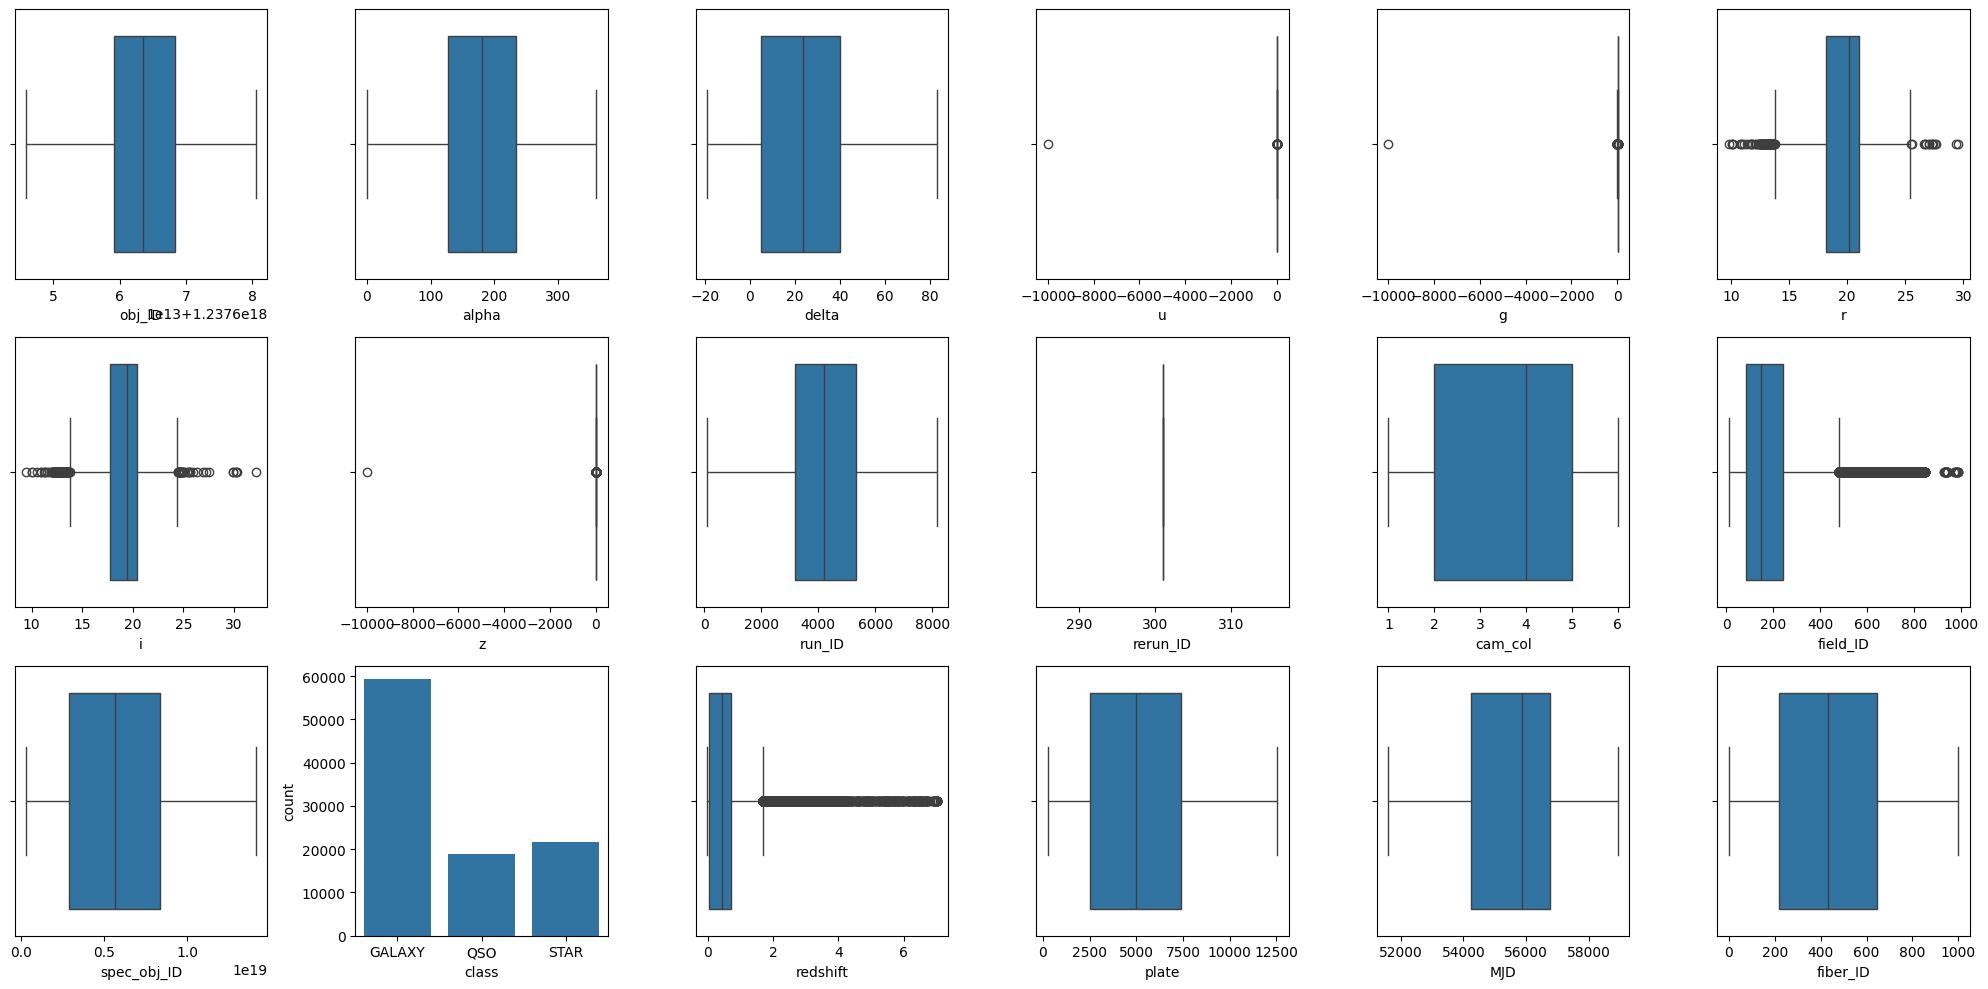

In [180]:
plt.figure(figsize=(20, 10)) #Crear una figura de 20x10
for col in data.columns: #Iterar
    plt.subplot(3,6, data.columns.get_loc(col)+1) #Crear un subplot de 3x6
    #Funcionamiento:plt.subplot(n_rows, n_col, indice)
    if col == "class": #Si la columna es la clase
        sns.countplot(data, x ="class") #Mostrar un barplot
    else: #Sino
        sns.boxplot(data, x=col) #Mostrar un boxplot
plt.tight_layout() #Ordenar visualmente
plt.show() #Mostrar la figura

In [181]:
#Filter data
def iqr(data, column): #Inter quantile range
    q3 = data[column].quantile(0.75) #3er cuartil
    q1 = data[column].quantile(0.25) #1er cuartil
    superior_limit = q3 + 1.5*(q3 - q1)
    inferior_limit = q1 - 1.5*(q3 - q1)
    return data[(data[column] < superior_limit) & (data[column] > inferior_limit)] #Selects data

In [182]:
data = data[["u","g","r","i","z", "class", "redshift"]]
#Selecciono columnas importantes
#data #Display

In [183]:
for col in data.columns:
    if col != "class": #Si la columna no es la clase
        data = iqr(data, col) #Filter data with iqr function
data

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


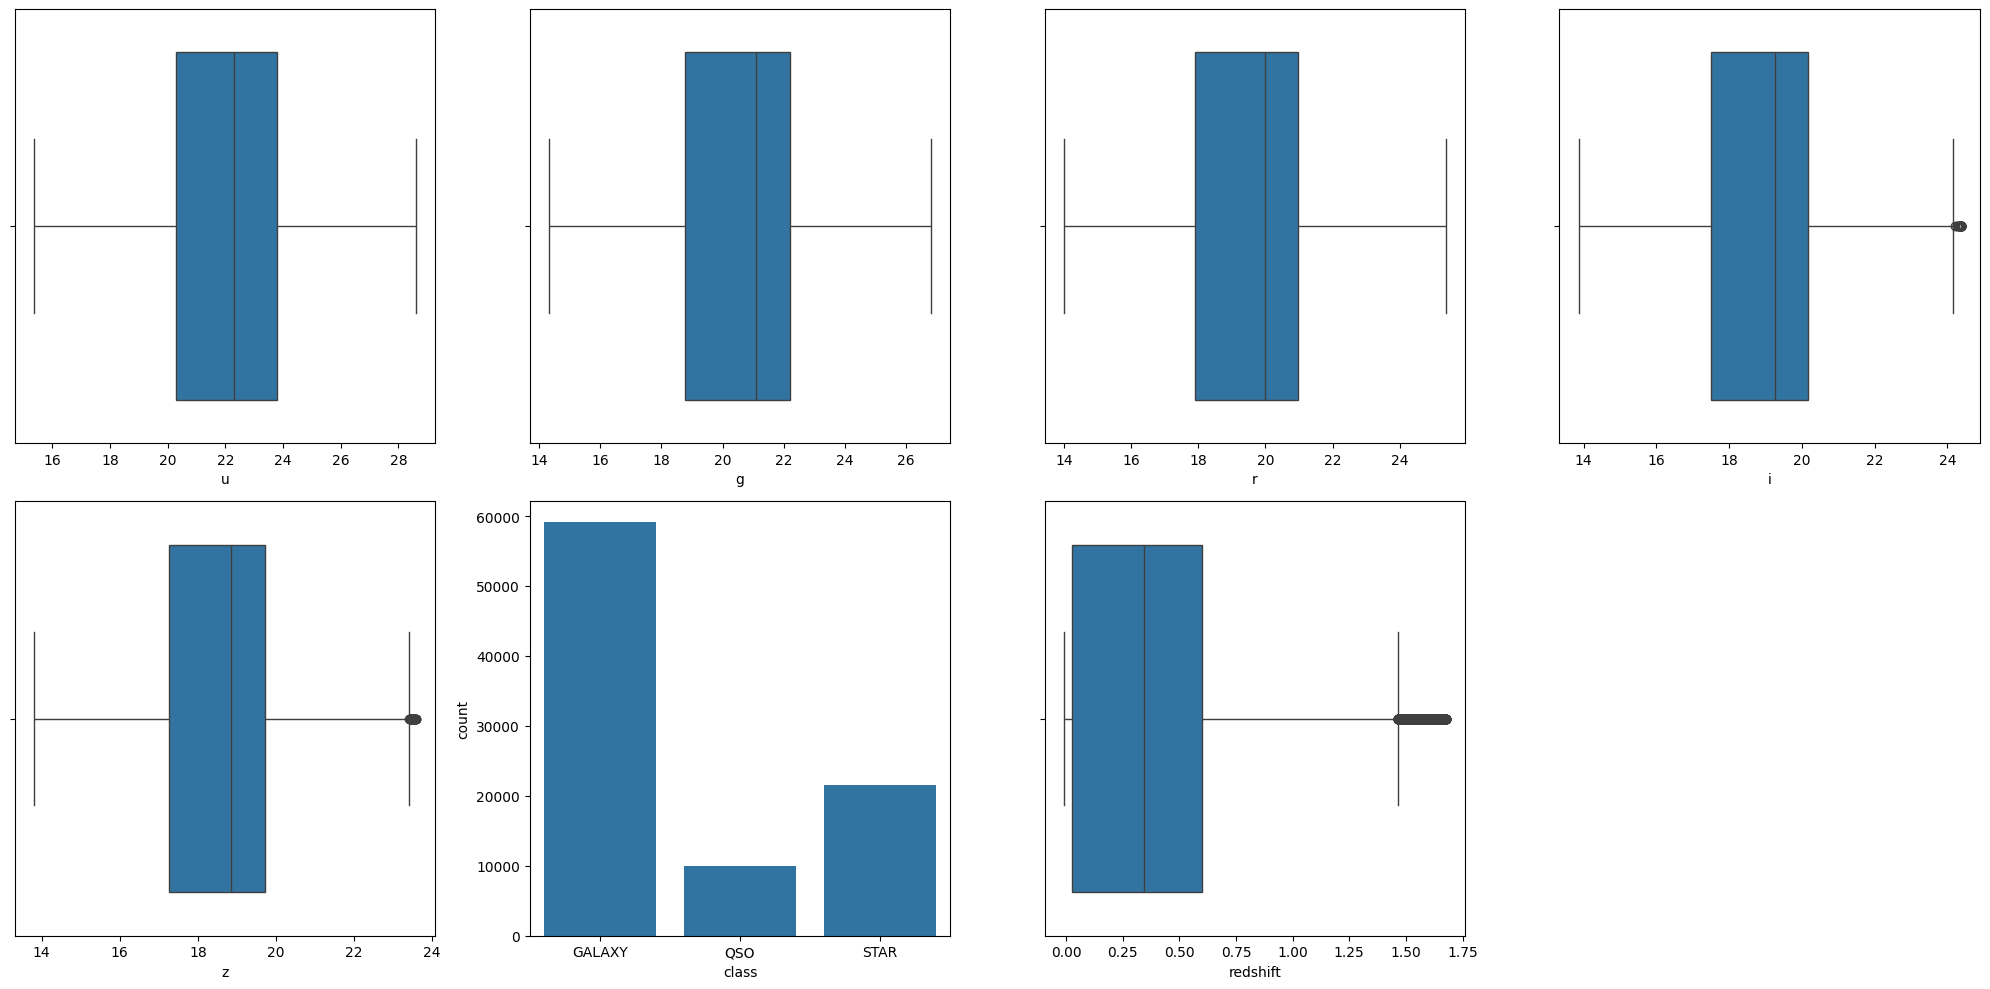

In [184]:
plt.figure(figsize=(20, 10)) #Crear una figura de 20x10
for col in data.columns: #Iterar
    plt.subplot(2,4, data.columns.get_loc(col)+1) #Crear un subplot de 2x4
    #Funcionamiento:plt.subplot(n_rows, n_col, indice)
    if col == "class": #Si la columna es la clase
        sns.countplot(data, x ="class") #Mostrar un barplot
    else: #Sino
        sns.boxplot(data, x=col) #Mostrar un boxplot
plt.tight_layout() #Ordenar visualmente
plt.show() #Mostrar la figura

In [185]:
X = data.drop(columns=["class"]) #X es el conjunto de datos sin la clase
y = data["class"] #y es la clase

<Axes: >

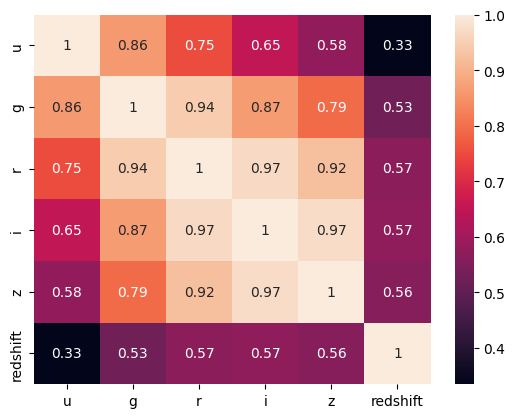

In [186]:
correlation_matrix = X.corr() #Calcula la matriz de correlacion
sns.heatmap(correlation_matrix, annot=True) #Plots heatmap
#Redundancia en las features

## Dimensionality reduction

In [187]:
from sklearn.preprocessing import StandardScaler #Importar StandardScaler
from sklearn.decomposition import PCA

In [188]:
ss = StandardScaler()
X = ss.fit_transform(X) #Normalizar los datos

In [189]:
pca = PCA() #Crear un objeto PCA
pca.fit(X) #Ajustar el PCA a los datos
pca.explained_variance_ratio_

array([0.78337473, 0.1207601 , 0.07636239, 0.01437141, 0.00331253,
       0.00181884])

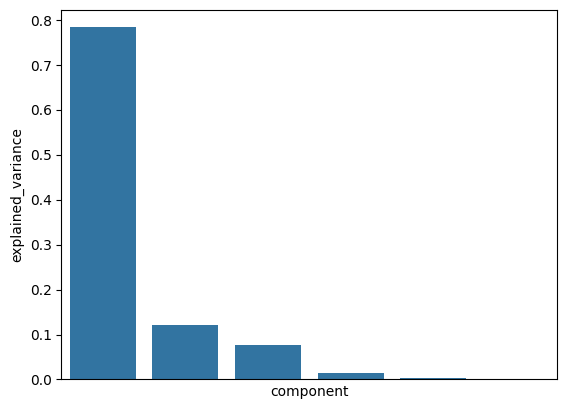

In [190]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_) #Gets explained variance
exp_variance["component"] = exp_variance.index + 1 #Assign a PC number
exp_variance = exp_variance.rename(columns={0: "explained_variance"}) #Rename 0 column to explained_variance
sns.barplot(exp_variance, x="component", y = "explained_variance") #Plot explained variance
plt.xticks([]) #Drops xticks
plt.show() #Display

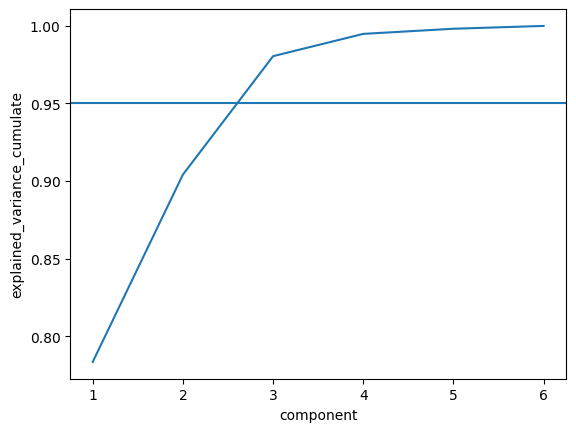

In [191]:
exp_variance["explained_variance_cumulate"] = exp_variance["explained_variance"].cumsum() #Cummulative sum
sns.lineplot(exp_variance, x = "component", y="explained_variance_cumulate") #Plots
plt.axhline(0.95)  #Plots line at 95% of variance
plt.show() #Display

In [192]:
pca = PCA(3)
X = pca.fit_transform(X)
X.shape

(90600, 3)

## Train model

In [193]:
from sklearn.model_selection import train_test_split, cross_validate #Importar train_test_split and cross validate
from sklearn.linear_model import LogisticRegression #Importar LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix #Importar classification_report y confusion_matrix
from sklearn.pipeline import Pipeline #Importar Pipeline

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Dividir los datos en train y test

In [195]:
lr = LogisticRegression(max_iter=1000) #Crear un objeto de regresion logistica
lr.fit(X_train, y_train) #Ajustar el modelo a los datos de train
y_pred = lr.predict(X_train) #Predecir los datos de test
print(classification_report(y_train, y_pred)) #Mostrar el reporte de clasificacion

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     47226
         QSO       0.89      0.76      0.82      7999
        STAR       0.96      1.00      0.98     17255

    accuracy                           0.95     72480
   macro avg       0.94      0.91      0.92     72480
weighted avg       0.95      0.95      0.95     72480



In [196]:
cv_roc = cross_validate(lr, X_train, y_train, cv=5, scoring="roc_auc_ovr")["test_score"] #Validacion cruzada de 5 folds
cv_roc.mean(), cv_roc.std() #Media de la validacion cruzada

(np.float64(0.981056739828818), np.float64(0.0018593859777917743))

In [197]:
y_pred = lr.predict(X_test) #Valores totalmente nuevos
y_prob = lr.predict_proba(X_test) #Predict probability
print(classification_report(y_test, y_pred)) #Report

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     11895
         QSO       0.88      0.77      0.82      1971
        STAR       0.96      1.00      0.98      4254

    accuracy                           0.95     18120
   macro avg       0.93      0.91      0.92     18120
weighted avg       0.95      0.95      0.95     18120



In [198]:
y_test 

21736    GALAXY
41018      STAR
6983       STAR
18577    GALAXY
93060    GALAXY
          ...  
41601    GALAXY
87267      STAR
55710    GALAXY
71073    GALAXY
86038      STAR
Name: class, Length: 18120, dtype: object

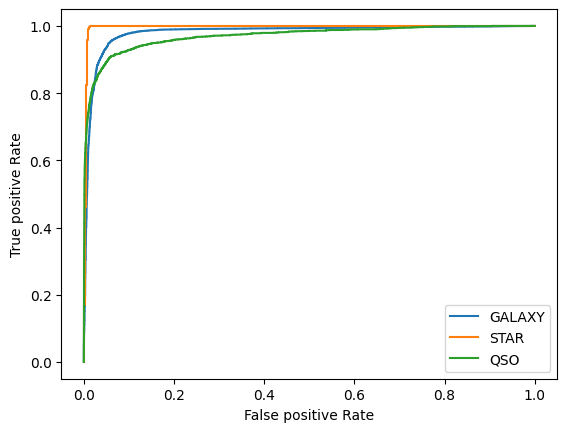

In [199]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test == "GALAXY", y_prob[:,0]) #Selecciono las galaxias y la primera columna
plt.plot(fpr, tpr, label ="GALAXY")

fpr, tpr, thresholds = roc_curve(y_test == "STAR", y_prob[:,2]) #Selcciono las estrellas y la 3ra columna
plt.plot(fpr, tpr, label ="STAR")

fpr, tpr, thresholds = roc_curve(y_test == "QSO", y_prob[:,1]) #Selecciono qso y la 2da columna
plt.plot(fpr, tpr, label ="QSO")
plt.legend()
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

In [200]:
X_test = pd.DataFrame(X_test, index=y_test.index) #Dataframe
X_test["class"] = y_test #Agrego la clase a los datos de test
X_test["pred"] = y_pred #Agrego la prediccion a los datos de test

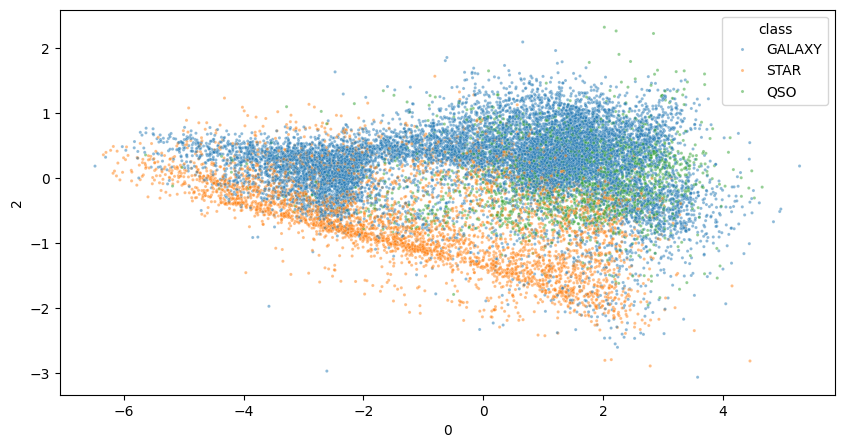

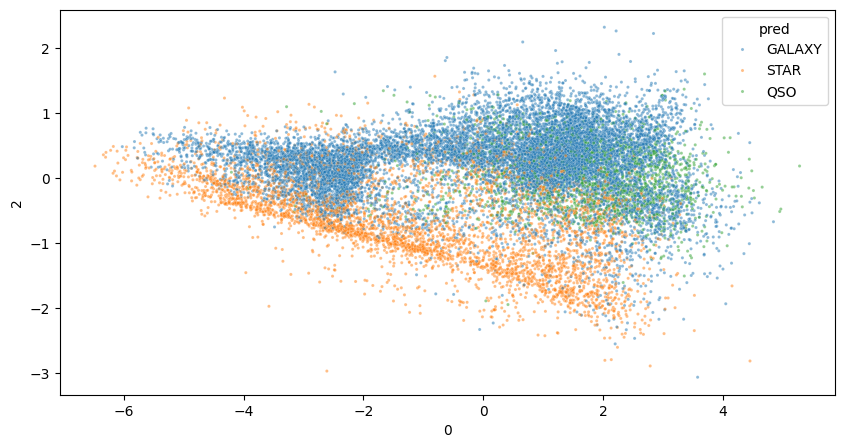

In [201]:
plt.figure(figsize=(10, 5)) #Crear una figura de 10x5
sns.scatterplot(X_test, x=0, y=2, hue="class",alpha=0.5, s=5) #Scatterplot de los datos de test
plt.show()
plt.figure(figsize=(10, 5)) #Crear una figura de 10x5
sns.scatterplot(X_test, x=0, y=2, hue="pred",alpha=0.5, s=5) #Scatterplot de los datos de test
plt.show()

In [202]:
!pip install joblib

In [203]:
pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(3)),
        ("lr", LogisticRegression(max_iter=1000))
    ]
)

In [204]:
X = data.drop(columns="class")
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Dividir los datos en train y test
pipeline.fit(X_train, y_train) #Ajustar el pipeline a los datos originales

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('lr', LogisticRegression(max_iter=1000))])

In [205]:
sample = X_test.sample(1000)
sample.to_csv("../datasets/guia_2/X_test.csv", index=False) #Exportar los datos de test a un csv
y_test.loc[sample.index.tolist()].to_csv("../datasets/guia_2/y_test.csv", index=False) #Exportar la clase a un csv

In [206]:
import joblib #Importar joblib
joblib.dump(pipeline, "model.job") #Guardar el modelo

['model.job']